In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

plt.style.use(["fivethirtyeight"])

## Exploration
Explore the data, searching for missing data, outliers.
Quick exploratory data analysis (EDA)

In [2]:
training_data_df = pd.read_csv("data/training_set_features.csv", encoding="utf-8")

In [3]:
training_data_df.shape

(26707, 36)

In [4]:
training_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

- Thanks to the shape we know that we have 26707 entries in training_data_df and 36 variables (columns).
- Thanks to info() we know that for some columns their is missing data.

In [5]:
nulls = training_data_df.isnull().sum()
print("There are %d columns having nulls in the dataset" % len(nulls[nulls != 0]))
nulls[nulls != 0]

There are 30 columns having nulls in the dataset


h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
household_adults                 249
h

In [6]:
nulls_percentage = nulls[nulls != 0] / training_data_df.shape[0] * 100
nulls_percentage.sort_values(inplace=True, ascending=False)
print("the percentages of null values per feature:\n")
print(round(nulls_percentage, 2))

the percentages of null values per feature:

employment_occupation          50.44
employment_industry            49.91
health_insurance               45.96
income_poverty                 16.56
doctor_recc_seasonal            8.09
doctor_recc_h1n1                8.09
rent_or_own                     7.65
employment_status               5.48
marital_status                  5.27
education                       5.27
chronic_med_condition           3.64
child_under_6_months            3.07
health_worker                   3.01
opinion_seas_sick_from_vacc     2.01
opinion_seas_risk               1.92
opinion_seas_vacc_effective     1.73
opinion_h1n1_sick_from_vacc     1.48
opinion_h1n1_vacc_effective     1.46
opinion_h1n1_risk               1.45
household_children              0.93
household_adults                0.93
behavioral_avoidance            0.78
behavioral_touch_face           0.48
h1n1_knowledge                  0.43
h1n1_concern                    0.34
behavioral_large_gatherings   

- The columns 'employment_industry', 'employment_occupation' and 'health_insurance' have more than 45% of null values. 

In [7]:
# Print the columns that have more than 2 uniques values (non binary) so those a categorical value or continuous value. Based on the number of values I think this is only categorical columns for the moment.
presume_categorical_feature = training_data_df.nunique()
presume_non_binary_cat_feature = presume_categorical_feature[training_data_df.nunique() > 2].sort_values()
print(f"The number of non binary categorical values: {len(presume_non_binary_cat_feature)-1} except 'respondent_id'")
presume_categorical_feature.sort_values()

The number of non binary categorical values: 19 except 'respondent_id'


behavioral_antiviral_meds          2
behavioral_wash_hands              2
behavioral_face_mask               2
behavioral_avoidance               2
behavioral_large_gatherings        2
doctor_recc_h1n1                   2
behavioral_touch_face              2
behavioral_outside_home            2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
doctor_recc_seasonal               2
health_insurance                   2
sex                                2
rent_or_own                        2
marital_status                     2
employment_status                  3
census_msa                         3
h1n1_knowledge                     3
income_poverty                     3
education                          4
h1n1_concern                       4
race                               4
household_adults                   4
household_children                 4
opinion_seas_sick_from_vacc        5
opinion_h1n1_risk                  5
o

### Univariate Analysis
I am going to plot some univariate chart to help me understand the data.

C:\Users\Django\AppData\Local\Temp\ipykernel_26280\248644263.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


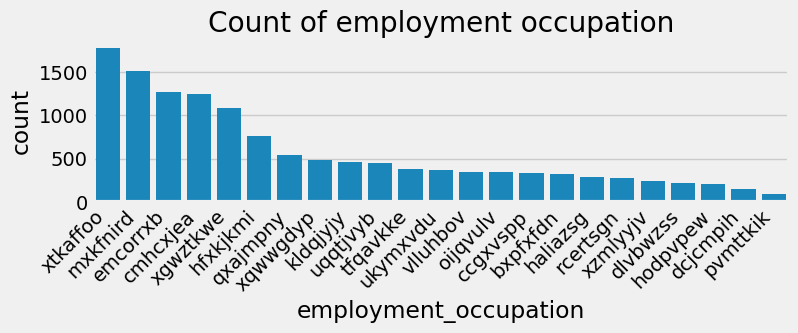

In [8]:
employment_occupation_counts = training_data_df["employment_occupation"].value_counts()
plt.figure(figsize=(8, 2))
plt.title("Count of employment occupation")
ax = sns.barplot(
    employment_occupation_counts,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [9]:
training_data_row = training_data_df.shape[0]

<function matplotlib.pyplot.show(close=None, block=None)>

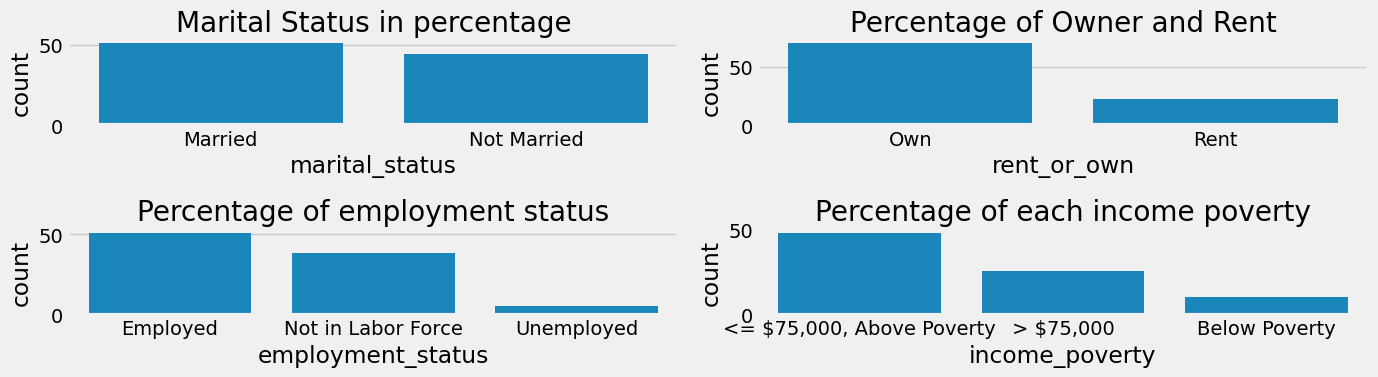

In [10]:
marital_status_percentage = training_data_df["marital_status"].value_counts() / training_data_row * 100
rent_or_own_percentage = training_data_df["rent_or_own"].value_counts() / training_data_row * 100
employment_status_percentage = training_data_df["employment_status"].value_counts() / training_data_row * 100
income_poverty_percentage = training_data_df["income_poverty"].value_counts() / training_data_row * 100
fig, axes = plt.subplots(2, 2, figsize=(14, 4))

sns.barplot(marital_status_percentage, ax=axes[0][0])
axes[0][0].set_title("Marital Status in percentage")

sns.barplot(rent_or_own_percentage, ax=axes[0][1])
axes[0][1].set_title("Percentage of Owner and Rent")

sns.barplot(employment_status_percentage, ax=axes[1][0])
axes[1][0].set_title("Percentage of employment status")

sns.barplot(income_poverty_percentage, ax=axes[1][1])
axes[1][1].set_title("Percentage of each income poverty")


plt.tight_layout()
plt.show

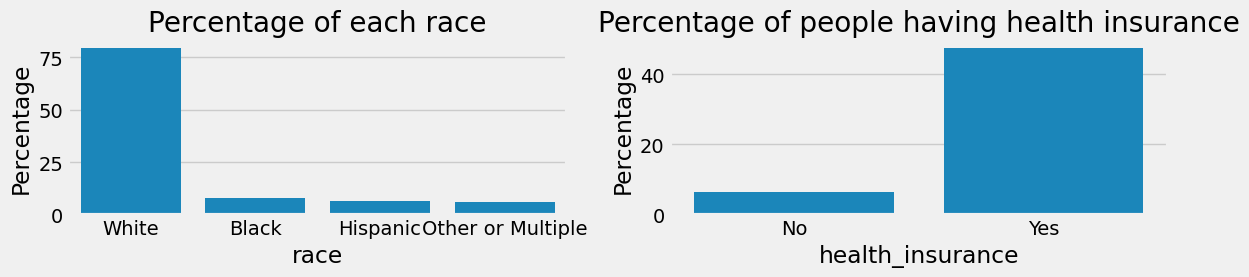

In [11]:
employment_industry_percentage = training_data_df["race"].value_counts() / training_data_df["race"].shape[0] * 100
health_insurance_percentage = training_data_df["health_insurance"].value_counts() / training_data_df["health_insurance"].shape[0] * 100

fig, (axes) = plt.subplots(1, 2, figsize=(12, 3))
sns.barplot(employment_industry_percentage, ax=axes[0])
axes[0].set_title("Percentage of each race")
axes[0].set_ylabel("Percentage")

sns.barplot(health_insurance_percentage, ax=axes[1])
axes[1].set_title("Percentage of people having health insurance")
axes[1].set_ylabel("Percentage")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["No", "Yes"])

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

### Bivariate Analysis

- Do I need to do plot between categorical features or between binary features ? 
	- In my opinion, No this is not necessary and even useless. Because I will get XOR chart or something similar

### Multivariate Analysis/ Correlation

Correlation between different variables (columns). The correlation can only be computed between non categorical features so I first need to transform the features.

In [12]:
presume_categorical_feature_list = presume_categorical_feature.index.to_list()
presume_categorical_feature_list.remove("respondent_id")
# presume_categorical_feature_list.remove("employment_industry")
# presume_categorical_feature_list.remove("employment_occupation")
len(presume_categorical_feature_list)

35

- For the moment I will keep "employment_industry" and "employment_occupation" but I believe I should remove them

In [13]:
dropping_features_list = [
    "respondent_id",
]  # "employment_industry", "employment_occupation"

- Feature transformations, converting categorical (nominal and ordinal) features to numerical features

In [14]:
nominal_feature_list = ["age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status", "hhs_geo_region", "census_msa", "employment_industry", "employment_occupation"]
ordinal_feature_list = ["income_poverty"]

In [15]:
# Nominal feature transformations
corre_df = pd.get_dummies(data=training_data_df, columns=nominal_feature_list)

# Ordinal feature transformations
enc = OrdinalEncoder()
enc.fit(training_data_df[ordinal_feature_list])
corre_df[ordinal_feature_list] = enc.transform(training_data_df[ordinal_feature_list])

# Dropping features
corre_df.drop(dropping_features_list, axis="columns", inplace=True)

In [16]:
corre_df.shape

(26707, 103)

In [17]:
corre_df.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [18]:
# Create correlation matrix
corr_matrix = corre_df.corr()

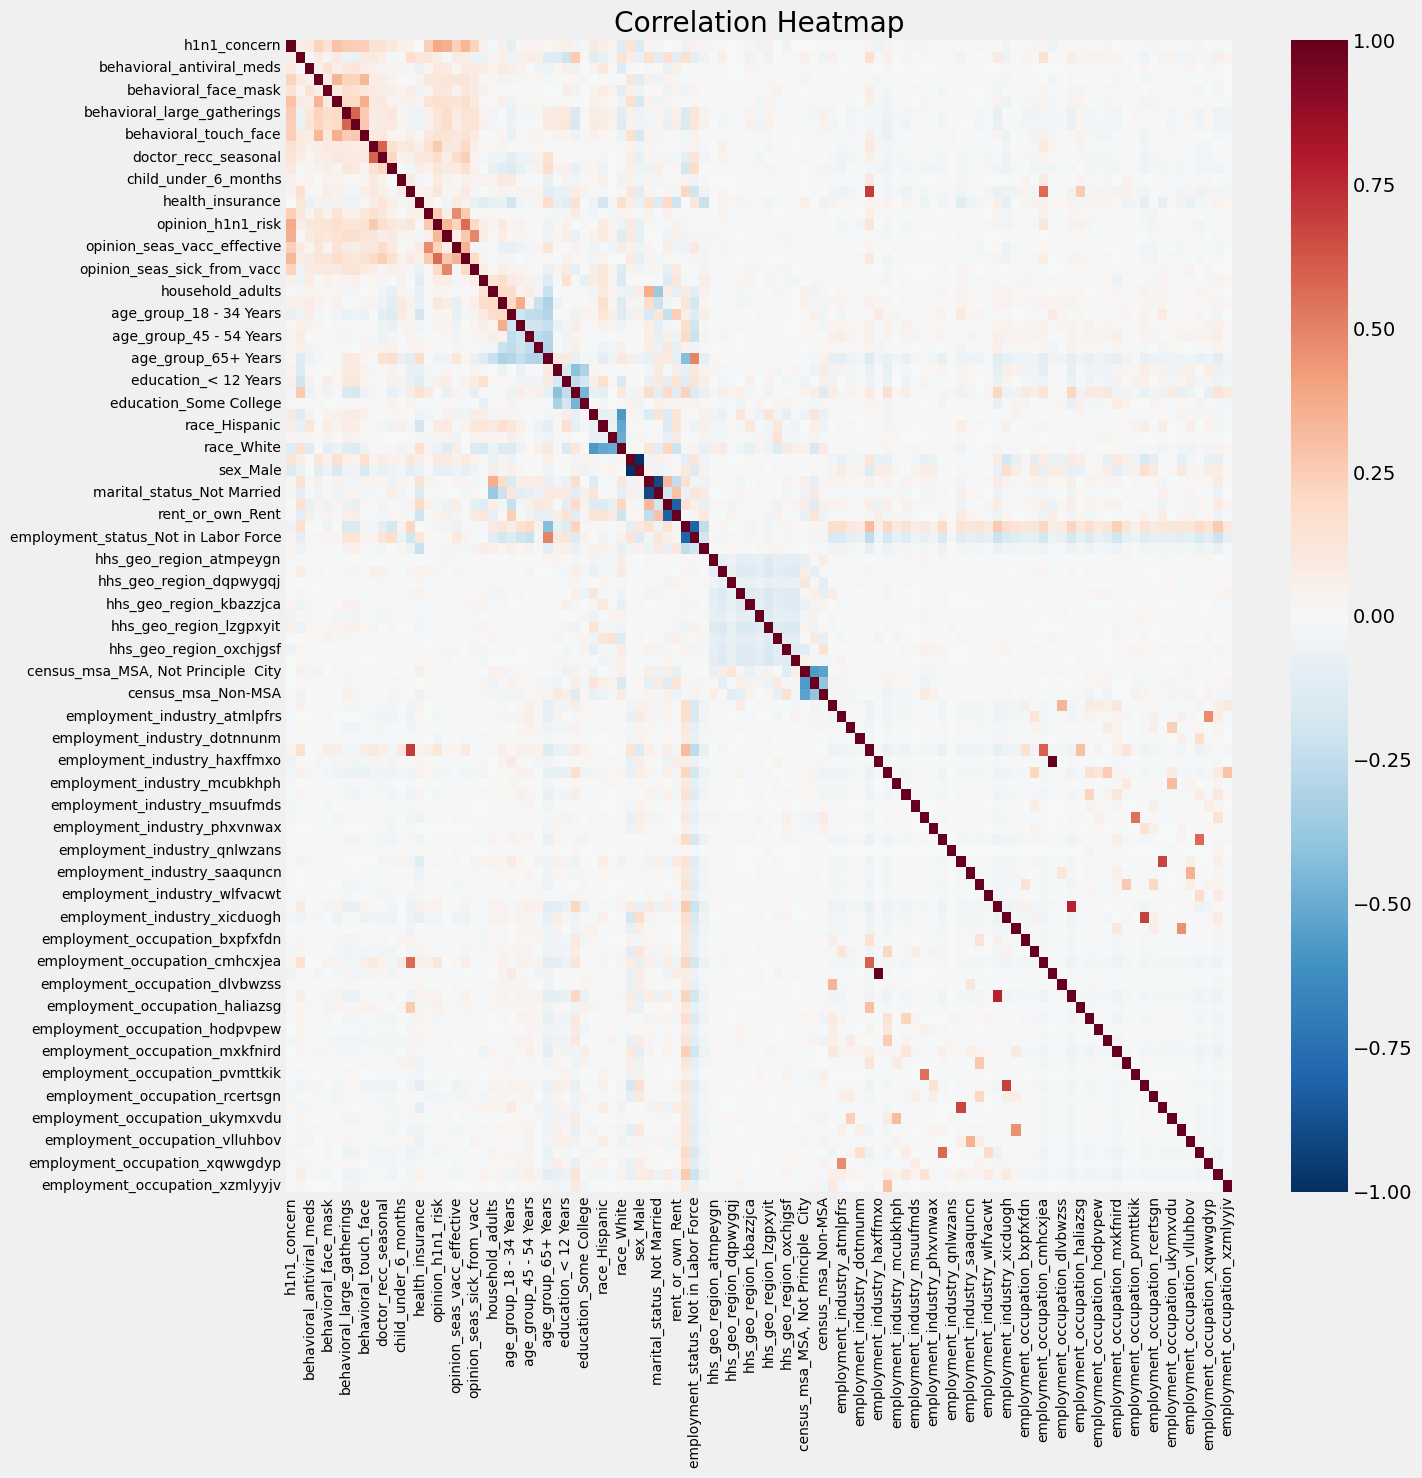

In [19]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 15))

# Using Seaborn to create a heatmap
ax = sns.heatmap(corr_matrix, cmap="RdBu_r")
ax.tick_params("both", labelsize=10)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


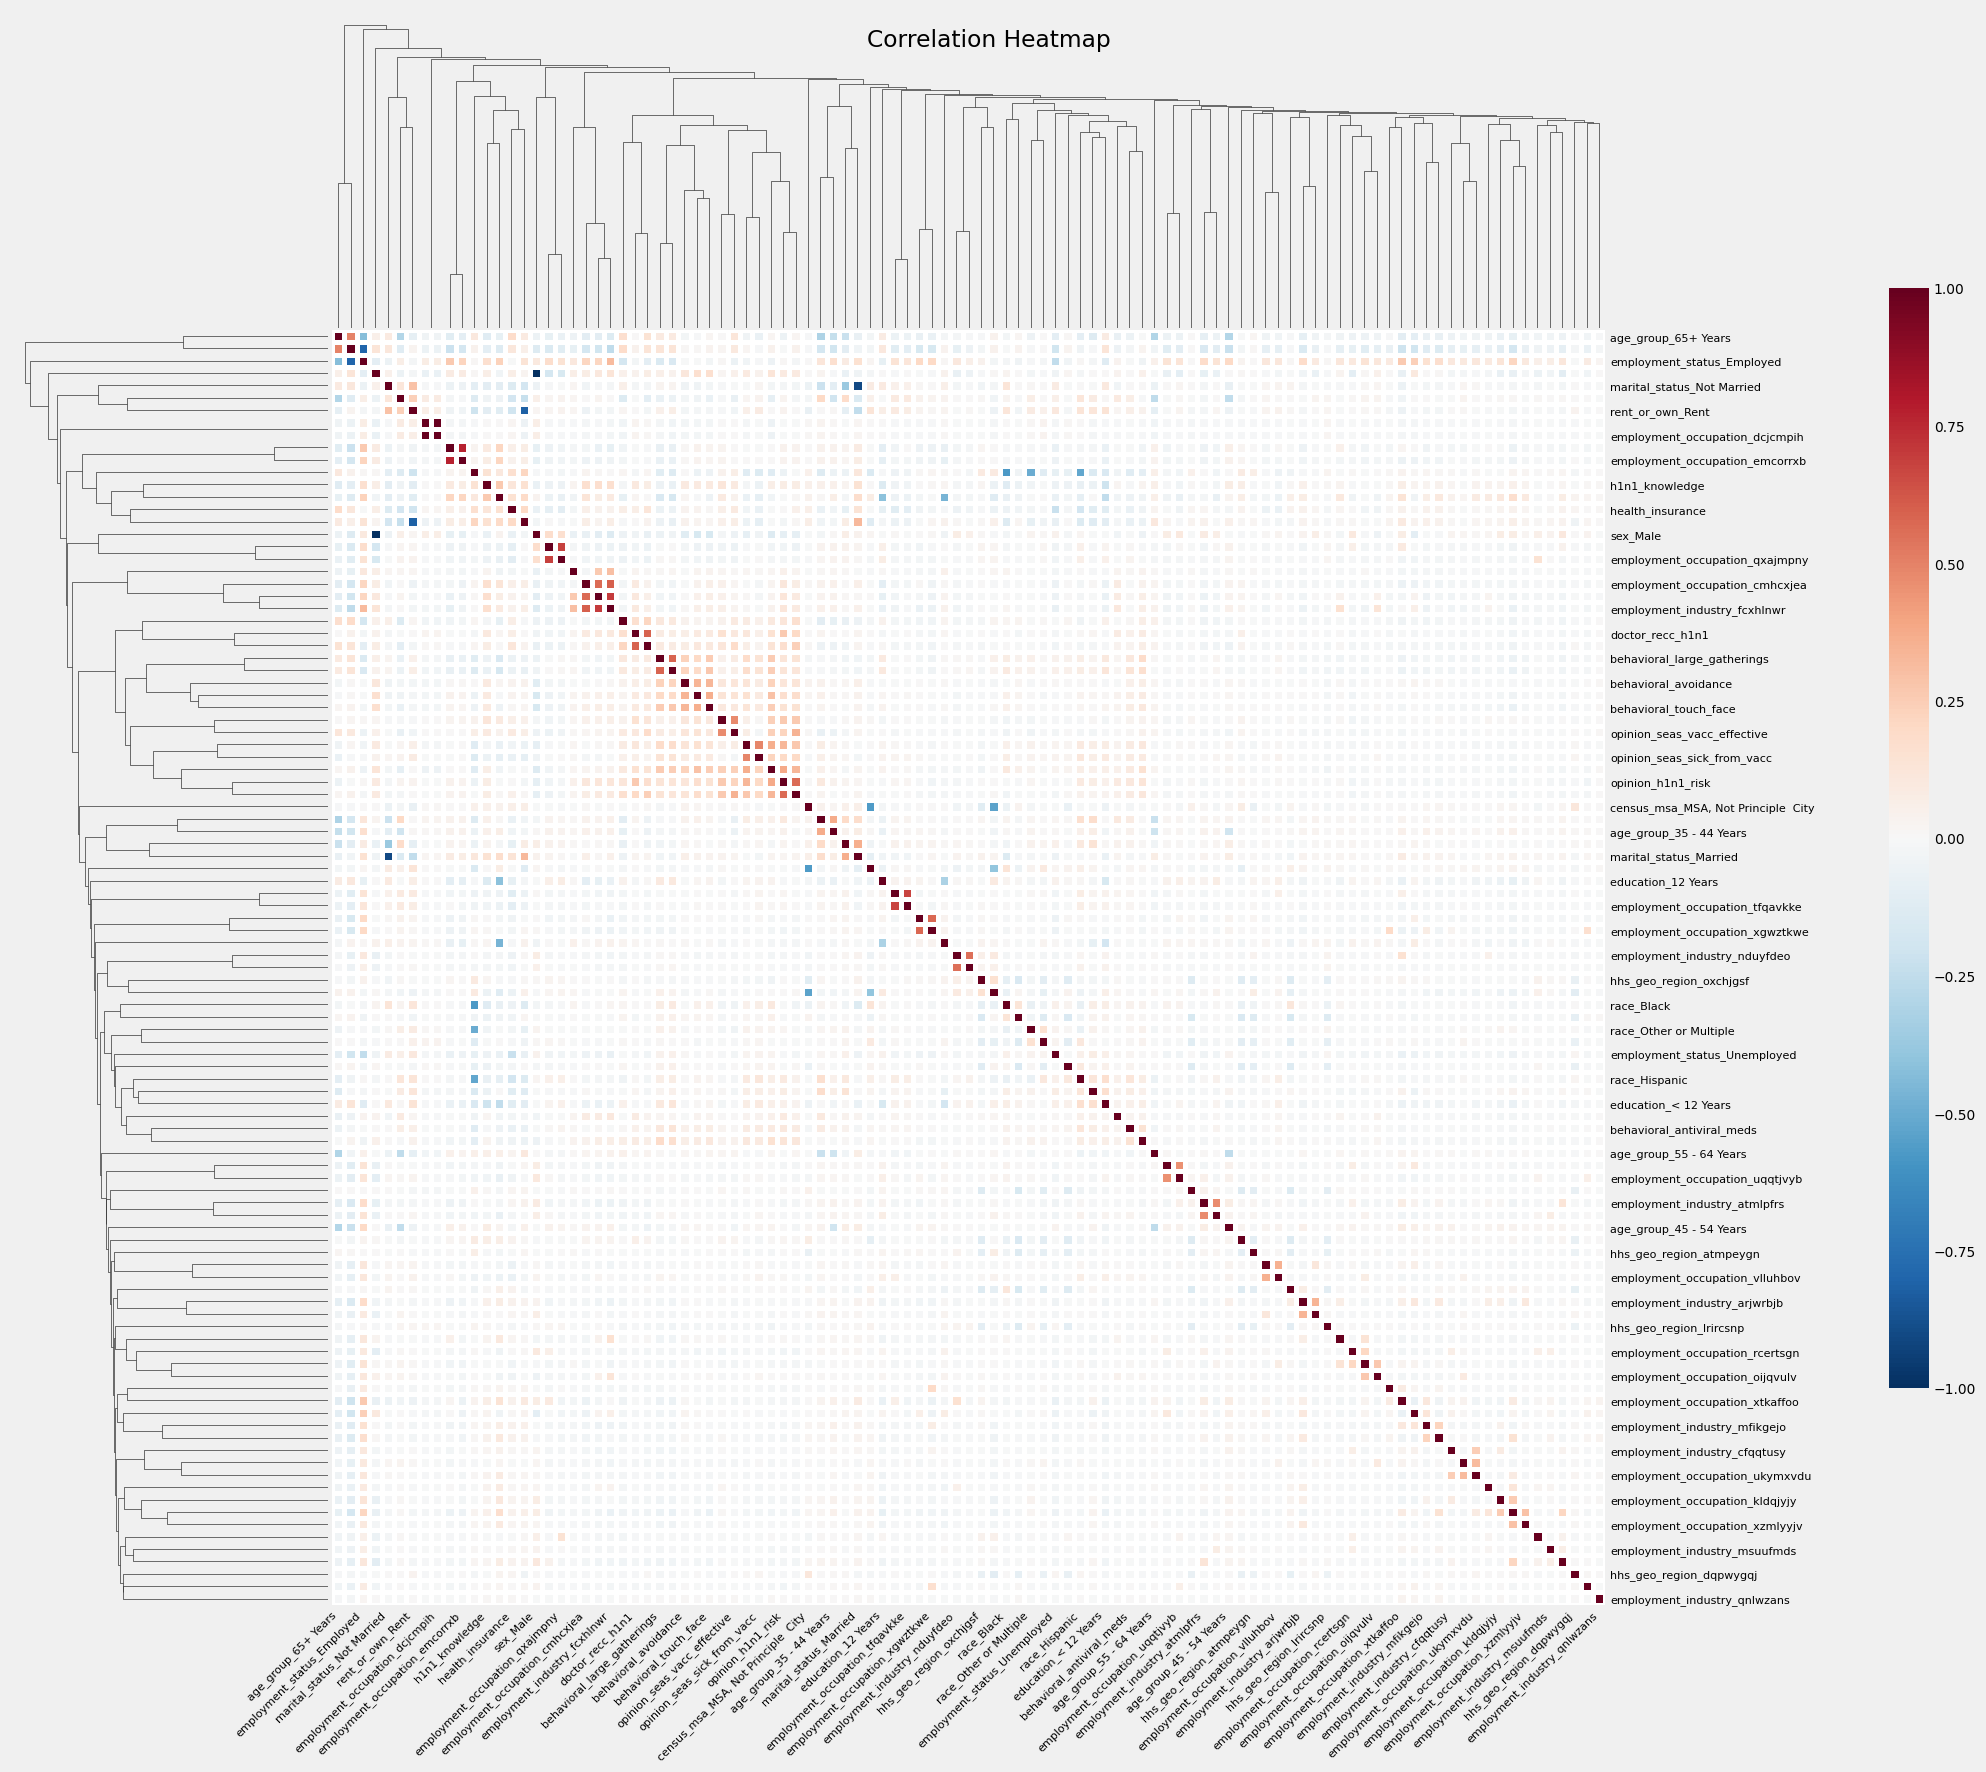

In [20]:
# Using Seaborn to create a heatmap (clustermap)
cm = sns.clustermap(corr_matrix, figsize=(20, 20), cmap="RdBu_r", linewidths=2.5, cbar_kws={"shrink": 0.8})
heatmap_ax = cm.ax_heatmap

cm.ax_heatmap.set_xticklabels(cm.ax_heatmap.get_xticklabels(), fontsize=8, rotation=45, ha="right")
cm.ax_heatmap.set_yticklabels(cm.ax_heatmap.get_yticklabels(), fontsize=8)

cm.cax.set_position([0.95, 0.3, 0.02, 0.55])
cm.cax.tick_params(labelsize=10)

cm.figure.suptitle("Correlation Heatmap")
# plt.tight_layout()
plt.show()

In [21]:
# correlation threshold
threshold = 0.5

correlation_triples = []

# Iterate through all pairs of features in the correlation matrix
for i, j in zip(*np.where(np.abs(corr_matrix) > threshold)):
    if i != j and i < j:  # Exclude diagonal  and redundant features pairs
        # Get feature names
        feature1 = corr_matrix.columns[i]
        feature2 = corr_matrix.columns[j]

        correlation_score = corr_matrix.iloc[i, j]

        correlation_triples.append((feature1, feature2, correlation_score))

correlation_df = pd.DataFrame(correlation_triples, columns=["Feature1", "Feature2", "Correlation"])

correlation_df

,Feature1,Feature2,Correlation
0,behavioral_large_gatherings,behavioral_outside_home,0.584085
1,doctor_recc_h1n1,doctor_recc_seasonal,0.591868
2,health_worker,employment_industry_fcxhlnwr,0.695702
3,health_worker,employment_occupation_cmhcxjea,0.566283
4,opinion_h1n1_risk,opinion_seas_risk,0.564208
5,race_Black,race_White,-0.577294
6,race_Hispanic,race_White,-0.521664
7,sex_Female,sex_Male,-1.000000
8,marital_status_Married,marital_status_Not Married,-0.899399
9,rent_or_own_Own,rent_or_own_Rent,-0.818975


- Some those are the feature that or the most correlated based on a threshold of 0.5.
- Usually a correlation score bigger than 0.5 is considered important. 
- Some of these pairs are useless for example sex_Female is correlated to sex_Male which make sense if you are a Male you cannot be a Female. So having both a the same time doesn't make sense.
- Thus the features on the columns Features 2 will be removed.
- In this case 19 features will be removed

In [22]:
# removing features2 from the features
data_df = corre_df.drop(labels=correlation_df["Feature2"], axis="columns")
features_list = data_df.columns.to_list()
print(data_df.shape)

# Adding back the respondent_id
data_df["respondent_id"] = training_data_df["respondent_id"]
data_df.head(2)

(26707, 85)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,...,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_rcertsgn,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,respondent_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1


## Data Cleaning and Preprocessing 

### Handling nulls
#### 1) Removing null


In [23]:
# Removing Nulls

data_df2 = data_df.dropna()
print(f"Row droppped: {data_df.shape[0] -data_df2.shape[0] }")
print(data_df.shape)
data_df2.shape

Row droppped: 14707
(26707, 86)


(12000, 86)

#### 2) Imputing using the most frequent (mode)

In [24]:
data_df3 = data_df.copy()
for feature in data_df3.columns:
    data_df3[feature] = data_df3[feature].fillna(data_df3[feature].mode()[0])

In [25]:
data_df3.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,...,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_rcertsgn,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,respondent_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1


In [26]:
# Check if there are any missing values left
print(data_df3.shape)

(26707, 86)


#### 3) KNNImputer
Using K-Nearest Neighbor algorithms to fill missing data. it will impute the missing values with the mean and the median of nearest neighbors data points.

In [27]:
# List of Categorical and Binary features
categorical_features_of_interest_list = [
    "h1n1_concern",
    "h1n1_knowledge",
    "opinion_h1n1_vacc_effective",
    "opinion_h1n1_risk",
    "opinion_h1n1_sick_from_vacc",
    "opinion_seas_vacc_effective",
    "opinion_seas_risk",
    "opinion_seas_sick_from_vacc",
    "age_group",
    "education",
    "race",
    "sex",
    "income_poverty",
    "marital_status",
    "rent_or_own",
    "employment_status",
    "hhs_geo_region",
    "census_msa",
    "household_adults",
    "household_children",
    "employment_industry",
    "employment_occupation",
]

In [28]:
binary_feature_of_interest = []
for feature in nulls_percentage.index:
    if feature not in categorical_features_of_interest_list:
        binary_feature_of_interest.append(feature)
binary_feature_of_interest

['health_insurance',
 'doctor_recc_seasonal',
 'doctor_recc_h1n1',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'behavioral_avoidance',
 'behavioral_touch_face',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_antiviral_meds',
 'behavioral_wash_hands',
 'behavioral_face_mask']

In [29]:
# Those a real categorical feature that need encoding
age_group_index = categorical_features_of_interest_list.index("age_group")
categorical_features_to_encode_list = categorical_features_of_interest_list[age_group_index:]

In [30]:
data_df4 = training_data_df.copy()

In [31]:
data_df4.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


In [32]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

knn_imputer = KNNImputer(n_neighbors=1)

label_encoder_dict: dict[str:LabelEncoder] = dict()
for cat_feature in categorical_features_to_encode_list:
    # using LabelEncoder to have number instead of text for categorical features while preserving null
    series = data_df4[cat_feature]
    label_encoder = LabelEncoder()
    data_df4[cat_feature] = pd.Series(label_encoder.fit_transform(series[series.notnull()]), index=series[series.notnull()].index)
    label_encoder_dict[cat_feature] = label_encoder

# KNN imputer
data_df4[categorical_features_of_interest_list + binary_feature_of_interest] = knn_imputer.fit_transform(data_df4[categorical_features_of_interest_list + binary_feature_of_interest])

In [33]:
data_df4.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0,10.0,10.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,12.0,19.0


In [34]:
for cat_feature in categorical_features_to_encode_list:
    data_df4[cat_feature] = data_df4[cat_feature].round().astype(int)

In [35]:
data_df4.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,1,0,1,8,2,0,0,10,10
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,1,1,0,1,0,0,0,12,19


In [36]:
for cat_feature in categorical_features_to_encode_list:  # using LabelEncoder to have the text back
    print(f"Currently processing feature: {cat_feature}")
    data_df4[cat_feature] = label_encoder_dict[cat_feature].inverse_transform(data_df4[cat_feature])

Currently processing feature: age_group
Currently processing feature: education
Currently processing feature: race
Currently processing feature: sex
Currently processing feature: income_poverty
Currently processing feature: marital_status
Currently processing feature: rent_or_own
Currently processing feature: employment_status
Currently processing feature: hhs_geo_region
Currently processing feature: census_msa
Currently processing feature: household_adults
Currently processing feature: household_children
Currently processing feature: employment_industry
Currently processing feature: employment_occupation


In [37]:
data_df4.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,nduyfdeo,mxkfnird
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


In [70]:
for cat_feature in categorical_features_to_encode_list:  # using LabelEncoder to have the text back
    print(f"Currently processing feature: {cat_feature}")
    data_df4[cat_feature] = label_encoder_dict[cat_feature].transform(data_df4[cat_feature])

Currently processing feature: age_group
Currently processing feature: education
Currently processing feature: race
Currently processing feature: sex
Currently processing feature: income_poverty
Currently processing feature: marital_status
Currently processing feature: rent_or_own
Currently processing feature: employment_status
Currently processing feature: hhs_geo_region
Currently processing feature: census_msa
Currently processing feature: household_adults
Currently processing feature: household_children
Currently processing feature: employment_industry
Currently processing feature: employment_occupation


In [71]:
data_df4.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2,1,0,1,8,2,0,0,10,10
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2,1,1,0,1,0,0,0,12,19


In [38]:
nulls_df4 = data_df4.isnull().sum()
print("There are %d columns having nulls in the dataset" % len(nulls_df4[nulls_df4 != 0]))
nulls_df4[nulls_df4 != 0]

There are 0 columns having nulls in the dataset


Series([], dtype: int64)

In [93]:
def preprocessing4(df, knn_imputer, label_encoder_dict, categorical_features_of_interest_list, binary_feature_of_interest):

    for cat_feature in label_encoder_dict.keys():
        # using LabelEncoder to have number instead of text for categorical features while preserving null
        series = df[cat_feature]
        label_encoder = label_encoder_dict[cat_feature]
        df[cat_feature] = pd.Series(label_encoder.transform(series[series.notnull()]), index=series[series.notnull()].index)

    # KNN imputer
    df[categorical_features_of_interest_list + binary_feature_of_interest] = knn_imputer.fit_transform(df[categorical_features_of_interest_list + binary_feature_of_interest])

    for cat_feature in categorical_features_to_encode_list:
        data_df4[cat_feature] = data_df4[cat_feature].round().astype(int)

    return df

### Feature Engineering and Selection
- Part of the feature selection was done with removing redundant features using correlation score.
- Feature importance

source: https://www.geeksforgeeks.org/what-is-feature-engineering/

#### Feature Selection (again)

In [41]:
training_data_label_df = pd.read_csv("data/training_set_labels.csv", encoding="utf-8")

In [42]:
training_data_label_df.shape

(26707, 3)

In [43]:
data_df2 = data_df2.set_index("respondent_id")

In [44]:
data2_labels = training_data_label_df[training_data_label_df["respondent_id"].isin(data_df2.index)]
data2_labels.shape
print(f"Data2 labels shape: {data2_labels.shape}")

Data2 labels shape: (12000, 3)


In [45]:
data_df3 = data_df3.set_index("respondent_id")

In [46]:
data3_labels = training_data_label_df[training_data_label_df["respondent_id"].isin(data_df3.index)]
print(f"Data3 labels shape: {data3_labels.shape}")

Data3 labels shape: (26707, 3)


In [67]:
data_df4 = data_df4.set_index("respondent_id")

In [68]:
data4_labels = training_data_label_df[training_data_label_df["respondent_id"].isin(data_df4.index)]
print(f"Data4 labels shape: {data4_labels.shape}")

Data4 labels shape: (26707, 3)


In [47]:
from scipy.stats import pearsonr

In [48]:
data2_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [78]:
correlations = {"h1n1_vaccine": {}, "seasonal_vaccine": {}}

for column in features_list:
    # Compute Pearson correlation between each feature and the labels
    feature_data = data_df2[column]
    corr_h1n1, _ = pearsonr(feature_data, data2_labels["h1n1_vaccine"])
    correlations["h1n1_vaccine"][column] = corr_h1n1

    corr_seasonal, _ = pearsonr(feature_data, data2_labels["seasonal_vaccine"])
    correlations["seasonal_vaccine"][column] = corr_seasonal

correlations = pd.DataFrame(correlations)

print(correlations)

                                h1n1_vaccine  seasonal_vaccine
h1n1_concern                        0.186720          0.171225
h1n1_knowledge                      0.160029          0.141805
behavioral_antiviral_meds           0.020564         -0.003725
behavioral_avoidance                0.059155          0.073242
behavioral_face_mask                0.071570          0.048011
...                                      ...               ...
employment_occupation_uqqtjvyb     -0.040570         -0.065755
employment_occupation_vlluhbov     -0.015632         -0.030632
employment_occupation_xqwwgdyp     -0.035899         -0.037202
employment_occupation_xtkaffoo      0.004250         -0.016015
employment_occupation_xzmlyyjv      0.003504         -0.003206

[85 rows x 2 columns]


In [79]:
correlations.loc[correlations.idxmax()]

,h1n1_vaccine,seasonal_vaccine
opinion_h1n1_risk,0.424593,0.259997
opinion_seas_vacc_effective,0.226642,0.381784


In [80]:
correlations.loc[correlations.idxmin()]

,h1n1_vaccine,seasonal_vaccine
race_Black,-0.069358,-0.078929
age_group_18 - 34 Years,-0.054183,-0.184491


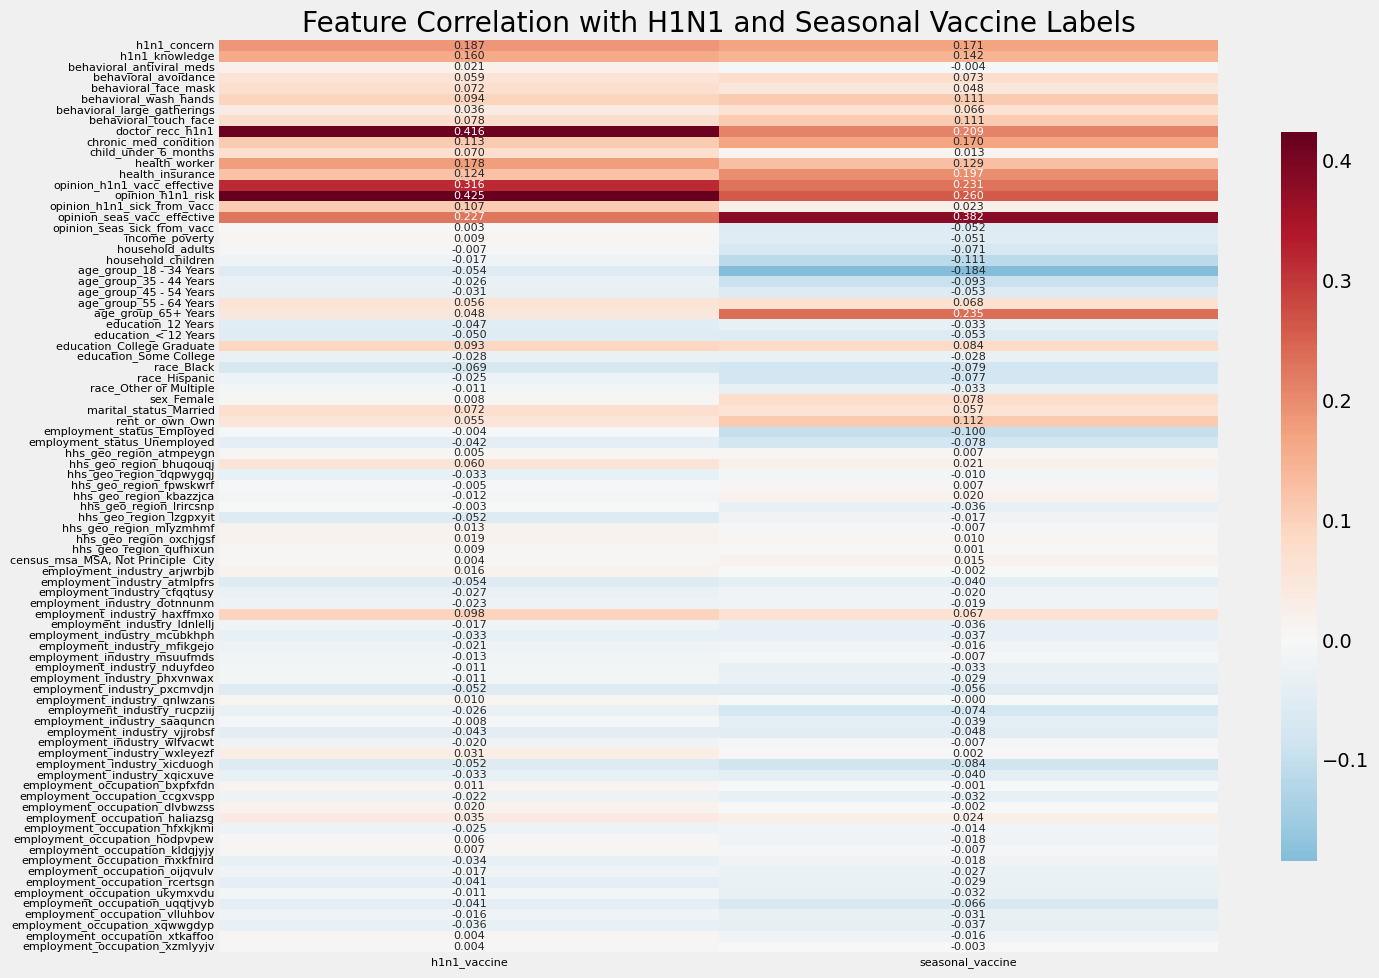

In [81]:
%matplotlib inline
plt.figure(figsize=(15, 10))
ax = sns.heatmap(correlations, cmap="RdBu_r", center=0, annot=True, fmt=".3f", annot_kws={"size": 8}, cbar_kws={"shrink": 0.8}, xticklabels=correlations.columns, yticklabels=correlations.index)
ax.tick_params("both", labelsize=8)
plt.title("Feature Correlation with H1N1 and Seasonal Vaccine Labels")
plt.tight_layout()
plt.show()

- No strong correlation between features and labels ( > 0.5) so I will not remove any features

In [53]:
def preprocessing1(data_df, ordinal_encoder, features_list_to_drop=correlation_df["Feature2"]):
    nominal_feature_list = [
        "age_group",
        "education",
        "race",
        "sex",
        "marital_status",
        "rent_or_own",
        "employment_status",
        "hhs_geo_region",
        "census_msa",
        "employment_industry",
        "employment_occupation",
    ]
    ordinal_feature_list = ["income_poverty"]
    # Nominal feature transformations
    data_df = pd.get_dummies(data=data_df, columns=nominal_feature_list)

    # Ordinal feature transformations
    data_df[ordinal_feature_list] = ordinal_encoder.transform(data_df[ordinal_feature_list])

    # Dropping features
    data_df.drop(features_list_to_drop, axis="columns", inplace=True)

    return data_df

In [ ]:
def preprocessing1(data_df, ordinal_encoder, features_list_to_drop=correlation_df["Feature2"]):
    nominal_feature_list = [
        "age_group",
        "education",
        "race",
        "sex",
        "marital_status",
        "rent_or_own",
        "employment_status",
        "hhs_geo_region",
        "census_msa",
        "employment_industry",
        "employment_occupation",
    ]
    ordinal_feature_list = ["income_poverty"]
    # Nominal feature transformations
    data_df = pd.get_dummies(data=data_df, columns=nominal_feature_list)

    # Ordinal feature transformations
    data_df[ordinal_feature_list] = ordinal_encoder.transform(data_df[ordinal_feature_list])

    # Dropping features
    data_df.drop(features_list_to_drop, axis="columns", inplace=True)

    return data_df

#### Feature Reduction

#####  Principal Component Analysis (PCA)

In [54]:
from sklearn.decomposition import PCA

n_components = 41
pca = PCA(n_components=n_components)  # number of principal component
pca.fit(data_df2[features_list])
feature_pca = pca.transform(data_df2[features_list])

data_df2_pca = pd.DataFrame(feature_pca, columns=[f"PC{i}" for i in range(1, n_components + 1)], index=data_df2.index)

In [55]:
data_df2.shape

(12000, 85)

- I am going to start with 5 components and changing this value according to results I will have with the models

## Data Spliting and Modeling 

- At the moment I have 2 datasets
	- data_df2: which contains only features that are not correlated between them
	- data_df2_pca: which contains PCA features

What do we want to predict ? : 
-  **how likely individuals are to receive their H1N1 and seasonal flu vaccines**

What are the labels:
- h1n1_vaccine - Whether respondent received H1N1 flu vaccine. (binary)
- seasonal_vaccine - Whether respondent received seasonal flu vaccine. (binary)

Both are binary variables: 0 = No; 1 = Yes. This is formulated as a multilabel (and not multiclass) problem.

As it is a multilabel problem it will make one model for each label.

For the models I will start with :
- Logistic regression

### Logistic regression with reduced feature (not PCA)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Model with data 1 
Data with dropped features based on correlation only no other feature selection

In [57]:
data2_labels = data2_labels.set_index("respondent_id")

In [58]:
seed = 2024
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(data_df2, data2_labels, test_size=test_size, random_state=seed)

In [59]:
X_train.shape

(8400, 85)

In [60]:
X_test.shape

(3600, 85)

In [65]:
model_h1n1_df1 = LogisticRegression()
model_seasonal_df1 = LogisticRegression()

# Train the models on each label
model_h1n1_df1.fit(X_train, y_train["h1n1_vaccine"])
model_seasonal_df1.fit(X_train, y_train["seasonal_vaccine"])

c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

LogisticRegression()

In [63]:
from sklearn.metrics import classification_report, roc_auc_score

In [66]:
def logistic_regression_basic_test_prediction(model_h1n1, model_seasonal, X_test, y_test):
    # Predict probabilities for each label on the test set
    prob_h1n1 = model_h1n1.predict_proba(X_test)[:, 1]  # Probability of class 1 (probability to receive vaccine class) for H1N1
    prob_seasonal = model_seasonal.predict_proba(X_test)[:, 1]  # Probability of class 1 (probability to receive vaccine class) for Seasonal Vaccine

    print("H1N1 Vaccine Probabilities:", prob_h1n1[:5])
    print("Seasonal Vaccine Probabilities:", prob_seasonal[:5])

    # The ROC AUC scores
    roc_auc_h1n1 = roc_auc_score(y_test["h1n1_vaccine"], prob_h1n1)
    roc_auc_seasonal = roc_auc_score(y_test["seasonal_vaccine"], prob_seasonal)
    roc_auc_mean = (roc_auc_h1n1 + roc_auc_seasonal) / 2
    print("H1N1 Vaccine ROC AUC: {:.3f}".format(roc_auc_h1n1))
    print("Seasonal Vaccine ROC AUC: {:.3f}".format(roc_auc_seasonal))
    print("Mean ROC AUC: {:.3f}".format(roc_auc_mean))

    # Evaluate model performance for both labels
    print("Classification Report for H1N1:")
    print(classification_report(y_test["h1n1_vaccine"], model_h1n1.predict(X_test)))

    print("Classification Report for Seasonal Vaccine:")
    print(classification_report(y_test["seasonal_vaccine"], model_seasonal.predict(X_test)))


logistic_regression_basic_test_prediction(model_h1n1=model_h1n1_df1, model_seasonal=model_seasonal_df1, X_test=X_test, y_test=y_test)

H1N1 Vaccine Probabilities: [0.04360439 0.70654114 0.04581257 0.18405433 0.07454246]
Seasonal Vaccine Probabilities: [0.48512573 0.72036058 0.63046781 0.27133362 0.31826135]
H1N1 Vaccine ROC AUC: 0.856
Seasonal Vaccine ROC AUC: 0.822
Mean ROC AUC: 0.839
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2529
           1       0.73      0.59      0.65      1071

    accuracy                           0.81      3600
   macro avg       0.78      0.75      0.76      3600
weighted avg       0.81      0.81      0.81      3600

Classification Report for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1776
           1       0.75      0.75      0.75      1824

    accuracy                           0.75      3600
   macro avg       0.75      0.75      0.75      3600
weighted avg       0.75      0.75      0.75      3600



#### Model with data 4
Data 4 contains all the rows and NAN values were imputed using KNN imputer of sklearn

In [86]:
seed = 2024
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data_df4, data4_labels, test_size=test_size, random_state=seed)

In [87]:
X_train.shape

(21365, 35)

In [88]:
model_h1n1_df4 = LogisticRegression()
model_seasonal_df4 = LogisticRegression()

# Train the models on each label
model_h1n1_df4.fit(X_train, y_train["h1n1_vaccine"])
model_seasonal_df4.fit(X_train, y_train["seasonal_vaccine"])

c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Django\Documents\project\h1n1_vaccin_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

LogisticRegression()

In [89]:
logistic_regression_basic_test_prediction(model_h1n1=model_h1n1_df4, model_seasonal=model_seasonal_df4, X_test=X_test, y_test=y_test)

H1N1 Vaccine Probabilities: [0.0599957  0.0262335  0.01008373 0.04522093 0.2234677 ]
Seasonal Vaccine Probabilities: [0.26353655 0.18036394 0.0191868  0.29637234 0.5243224 ]
H1N1 Vaccine ROC AUC: 0.827
Seasonal Vaccine ROC AUC: 0.847
Mean ROC AUC: 0.837
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4208
           1       0.68      0.39      0.50      1134

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.70      5342
weighted avg       0.82      0.83      0.81      5342

Classification Report for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      2857
           1       0.78      0.72      0.75      2485

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.77      5342
weighted avg       0.78      0.78      0.77      5342



#### Submission of module using data 1 

In [100]:
def make_submission_format(
    model_h1n1,
    model_seasonal,
    X,
):
    prob_h1n1 = model_h1n1.predict_proba(X)[:, 1]
    prob_seasonal = model_seasonal.predict_proba(X)[:, 1]
    submission_df = pd.DataFrame({"respondent_id": X.index, "h1n1_vaccine": prob_h1n1, "seasonal_vaccine": prob_seasonal})
    return submission_df

In [95]:
submission_df = pd.read_csv("data/test_set_features.csv", encoding="utf-8")
submission_df = submission_df.set_index("respondent_id")

In [96]:
submission_df.shape

(26708, 35)

In [145]:
submission_df = preprocessing1(submission_df, ordinal_encoder=enc)
submission_df.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,...,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_rcertsgn,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [146]:
submission_df.shape

(26708, 85)

In [147]:
missing_data = submission_df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_percentage = (missing_data / len(submission_df)) * 100
print(missing_data)
print(missing_percentage)

h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_sick_from_vacc      521
income_poverty                  4497
household_adults                 225
household_children               225
dtype: int64
h1n1_concern                    0.318257
h1n1_knowledge                  0.456792
behavioral_antiviral_meds       0.295792
behavioral_avoidance            0.797514
behavioral_face_mask            0.071140
behav

In [148]:
submission_df.shape

(26708, 85)

In [149]:
for feature in submission_df.columns:
    submission_df[feature] = submission_df[feature].fillna(submission_df[feature].mode()[0])

In [151]:
submission_df.isna().any().any()

np.False_

In [ ]:
submission_df.shape

(11969, 85)

In [ ]:
submission_data = make_submission_format(model_h1n1_df1, model_seasonal_df1, submission_df)

In [154]:
submission_data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.060162,0.462687
1,26708,0.032918,0.060011
2,26709,0.686732,0.769620
3,26710,0.541607,0.759396
4,26711,0.138362,0.426016


In [ ]:
submission_data.to_csv("data/submission_data.csv", index=False, encoding="utf-8")

#### Submission of module using data 4

In [101]:
submission_data4 = preprocessing4(submission_df, knn_imputer, label_encoder_dict, categorical_features_of_interest_list, binary_feature_of_interest)

ValueError: y contains previously unseen labels: 1.0

In [98]:
submission_data4.shape

(26708, 35)

In [102]:
submission_data4 = make_submission_format(model_h1n1_df4, model_seasonal_df4, submission_data4)

In [103]:
submission_data4.head(2)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.087672,0.254226
1,26708,0.042074,0.045885


In [104]:
submission_data4.to_csv("data/submission_data4.csv", index=False, encoding="utf-8")

### Logistic regression with PCA data

In [298]:
pca_data_labels = training_data_label_df[training_data_label_df["respondent_id"].isin(data_df2.index)]

In [299]:
pca_data_labels = pca_data_labels.set_index("respondent_id")

In [300]:
seed = 2024
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data_df2_pca, pca_data_labels, test_size=test_size, random_state=seed)

In [301]:
model_h1n1_pca = LogisticRegression()
model_seasonal_pca = LogisticRegression()

# Train the models on each label
model_h1n1_pca.fit(X_train, y_train["h1n1_vaccine"])
model_seasonal_pca.fit(X_train, y_train["seasonal_vaccine"])

LogisticRegression()

In [302]:
# Predict probabilities for each label on the test set
prob_h1n1_pca = model_h1n1_pca.predict_proba(X_test)[:, 1]  # Probability of class 1 (probability to receive vaccine class) for H1N1
prob_seasonal_pca = model_seasonal_pca.predict_proba(X_test)[:, 1]  # Probability of class 1 (probability to receive vaccine class) for Seasonal Vaccine

print("H1N1 Vaccine Probabilities:", prob_h1n1_pca[:5])
print("Seasonal Vaccine Probabilities:", prob_seasonal_pca[:5])

# The ROC AUC scores
roc_auc_h1n1_pca = roc_auc_score(y_test["h1n1_vaccine"], prob_h1n1_pca)
roc_auc_seasonal_pca = roc_auc_score(y_test["seasonal_vaccine"], prob_seasonal_pca)
roc_auc_mean_pca = (roc_auc_h1n1_pca + roc_auc_seasonal_pca) / 2
print("H1N1 Vaccine ROC AUC: {:.3f}".format(roc_auc_h1n1_pca))
print("Seasonal Vaccine ROC AUC: {:.3f}".format(roc_auc_seasonal_pca))
print("Mean ROC AUC: {:.3f}".format(roc_auc_mean_pca))

# Evaluate model performance for both labels
print("Classification Report for H1N1:")
print(classification_report(y_test["h1n1_vaccine"], model_h1n1_pca.predict(X_test)))

print("Classification Report for Seasonal Vaccine:")
print(classification_report(y_test["seasonal_vaccine"], model_seasonal_pca.predict(X_test)))

H1N1 Vaccine Probabilities: [0.04046707 0.73323023 0.04391309 0.28667469 0.07521367]
Seasonal Vaccine Probabilities: [0.49289025 0.72824749 0.60635581 0.42313448 0.31990632]
H1N1 Vaccine ROC AUC: 0.853
Seasonal Vaccine ROC AUC: 0.814
Mean ROC AUC: 0.834
Classification Report for H1N1:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1679
           1       0.73      0.59      0.65       721

    accuracy                           0.81      2400
   macro avg       0.79      0.75      0.76      2400
weighted avg       0.81      0.81      0.81      2400

Classification Report for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1164
           1       0.76      0.74      0.75      1236

    accuracy                           0.75      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       0.75      0.75      0.75      2400



In [303]:
submission_df = pd.read_csv("data/test_set_features.csv", encoding="utf-8")
submission_df = submission_df.set_index("respondent_id")

In [304]:
submission_df = preprocessing1(submission_df, ordinal_encoder=enc)
submission_df.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,...,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_rcertsgn,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [305]:
for feature in submission_df.columns:
    submission_df[feature] = submission_df[feature].fillna(submission_df[feature].mode()[0])

In [306]:
# n_components = 20
# pca = PCA(n_components=n_components)  # number of principal component
# pca.fit(data_df2[features_list])
submission_feature_pca = pca.transform(submission_df[features_list])
submission_df_pca = pd.DataFrame(submission_feature_pca, columns=[f"PC{i}" for i in range(1, n_components + 1)], index=submission_df.index)

In [307]:
submission_data = make_submission_format(model_h1n1_pca, model_seasonal_pca, submission_df_pca)

In [308]:
submission_data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.097248,0.427151
1,26708,0.035492,0.051275
2,26709,0.735700,0.845816
3,26710,0.552786,0.782380
4,26711,0.156794,0.374543


In [309]:
submission_data.to_csv("data/submission_data_pca.csv", index=False, encoding="utf-8")